In [1]:
import sklearn
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

# Exercise 1: Digits

In [2]:
X, y = load_digits(return_X_y=True)

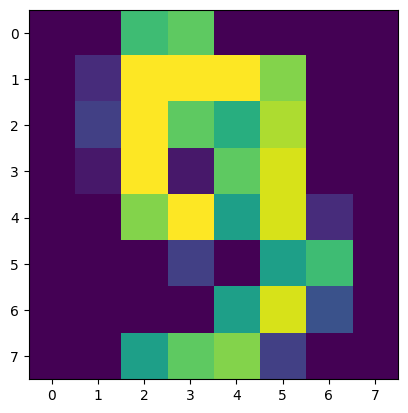

In [3]:
nmb = X[9].reshape(8,8)
plt.imshow(nmb)

### Preprocessing

In [4]:
X_train = X[:-200]
X_test = X[-200:]
y_train = y[:-200]
y_test = y[-200:]

In [5]:
print("The scaler has to be fitted only once, it is wrong to fit it on test, then transform!")
myScaler = StandardScaler()
myScaler.fit(X_train)
X_train = myScaler.transform(X_train)
X_test = myScaler.transform(X_test)

The scaler has to be fitted only once, it is wrong to fit it on test, then transform!


### Model Train

In [6]:
print(np.unique(y))
print("Number of labels: ", len(np.unique(y)))
print("Logistic regression can still be used in a repeated ONE VS ALL manner")

[0 1 2 3 4 5 6 7 8 9]
Number of labels:  10
Logistic regression can still be used in a repeated ONE VS ALL manner


In [7]:
lm = LogisticRegression(solver="lbfgs")
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print(f"Accuracy Score = {accuracy_score(y_test, y_pred)}")

Accuracy Score = 0.92


### Add PCA feature selection

In [11]:
myPCA = PCA(.95)
myPCA.fit(X_train)
X_train = myPCA.transform(X_train)
X_test = myPCA.transform(X_test)

print(".95 of the variance is kept")
print("More general kind of input -> will automatically understand how many features keep the variance wanted")

.95 of the variance is kept
More general kind of input -> will automatically understand how many features keep the variance wanted
X_train.shape from (_ ,64) to  (1597, 32)


In [9]:
lm = LogisticRegression(solver="lbfgs")
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print(f"Accuracy Score = {accuracy_score(y_test, y_pred)}")
print("Of course less information (=less features) will drop the accuracy, but we see that is not that substantial")

Accuracy Score = 0.91
Of course less information (=less features) will drop the accuracy, but we see that is not that substantial


In [10]:
print("Number of features:", len(X_train[0]), "vs 64 from the initial dataset")
print("PCA kept only the most important features, by eliminating the ones that less characterized the outputs")

Number of features: 40 vs 64 from the initial dataset
PCA kept only the most important features, by eliminating the ones that less characterized the outputs


# Exercise 2: Fashion MNIST

In [16]:
class myPCA:
    
    def fit(data):
        cov_matrix = np.cov(data)
        e_val, e_vec = np.linalg.eig(cov_matrix)
            
X, y = load_digits(return_X_y=True)
X_train = X[:-200]
X_test = X[-200:]
myScaler = StandardScaler()
myScaler.fit(X_train)
X_train = myScaler.transform(X_train)

myPCA(X_train)

[ 1.87391050e+02+0.00000000e+00j  1.48958643e+02+0.00000000e+00j
  1.29703694e+02+0.00000000e+00j ... -1.08156427e-16-8.45691193e-18j
  8.21336201e-17+2.15217636e-17j  8.21336201e-17-2.15217636e-17j]
[63 62 66 ...  2  1  0]
